<a href="https://colab.research.google.com/github/aman-6/Data-Projects/blob/main/Bike_Demand_Forecast_using_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression , Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from xgboost import XGBRegressor
import warnings
warnings.filterwarnings('ignore')

In [2]:
ab=pd.read_csv('Ola Ride.csv')
ab

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,1/1/2011 0:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,1/1/2011 0:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,1/1/2011 1:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,1/1/2011 1:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,1/1/2011 2:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
21767,12/19/2012 21:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
21768,12/19/2012 22:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
21769,12/19/2012 22:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
21770,12/19/2012 23:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


In [3]:
ab.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,1/1/2011 0:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,1/1/2011 0:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,1/1/2011 1:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,1/1/2011 1:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,1/1/2011 2:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [4]:
ab.tail(15)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
21757,12/19/2012 16:00,4,0,1,1,11.48,14.395,75,7.0015,8,309,317
21758,12/19/2012 17:00,4,0,1,1,13.12,16.665,70,7.0015,17,147,164
21759,12/19/2012 17:00,4,0,1,1,16.40,20.455,54,15.0013,31,169,200
21760,12/19/2012 18:00,4,0,1,1,16.40,20.455,54,19.0012,33,203,236
21761,12/19/2012 18:00,4,0,1,1,17.22,21.210,50,12.9980,30,183,213
21762,12/19/2012 19:00,4,0,1,1,17.22,21.210,50,12.9980,33,185,218
21763,12/19/2012 19:00,4,0,1,1,17.22,21.210,50,19.0012,28,209,237
21764,12/19/2012 20:00,4,0,1,1,17.22,21.210,50,23.9994,37,297,334
21765,12/19/2012 20:00,4,0,1,1,16.40,20.455,50,26.0027,26,536,562
21766,12/19/2012 21:00,4,0,1,1,15.58,19.695,50,23.9994,23,546,569


In [5]:
ab.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,21772.000000,21772.000000,21772.000000,21772.000000,21772.000000,21772.000000,21772.000000,21772.000000,21772.000000,21772.000000,21772.000000
mean,2.506614,0.028569,0.680875,1.418427,20.230860,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116149,0.166595,0.466148,0.633824,7.791411,8.474406,19.244591,8.164350,49.959329,151.035564,181.140294
min,1.000000,0.000000,0.000000,1.000000,0.820000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.940000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.500000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.240000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.000000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [6]:
ab.describe().T

,count,mean,std,min,25%,50%,75%,max
season,21772.0,2.506614,1.116149,1.00,2.0000,3.000,4.0000,4.0000
holiday,21772.0,0.028569,0.166595,0.00,0.0000,0.000,0.0000,1.0000
workingday,21772.0,0.680875,0.466148,0.00,0.0000,1.000,1.0000,1.0000
weather,21772.0,1.418427,0.633824,1.00,1.0000,1.000,2.0000,4.0000
temp,21772.0,20.230860,7.791411,0.82,13.9400,20.500,26.2400,41.0000
atemp,21772.0,23.655084,8.474406,0.76,16.6650,24.240,31.0600,45.4550
humidity,21772.0,61.886460,19.244591,0.00,47.0000,62.000,77.0000,100.0000
windspeed,21772.0,12.799395,8.164350,0.00,7.0015,12.998,16.9979,56.9969
casual,21772.0,36.021955,49.959329,0.00,4.0000,17.000,49.0000,367.0000
registered,21772.0,155.552177,151.035564,0.00,36.0000,118.000,222.0000,886.0000


In [7]:
ab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21772 entries, 0 to 21771
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    21772 non-null  object 
 1   season      21772 non-null  int64  
 2   holiday     21772 non-null  int64  
 3   workingday  21772 non-null  int64  
 4   weather     21772 non-null  int64  
 5   temp        21772 non-null  float64
 6   atemp       21772 non-null  float64
 7   humidity    21772 non-null  int64  
 8   windspeed   21772 non-null  float64
 9   casual      21772 non-null  int64  
 10  registered  21772 non-null  int64  
 11  count       21772 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 2.0+ MB


In [8]:
ab.shape

(21772, 12)

In [9]:
def convert_date(ab):
    ab['datetime'] = pd.to_datetime(ab['datetime'])
    ab['month'] = ab['datetime'].dt.month
    ab['hour'] = ab['datetime'].dt.hour
    ab['weekday'] = ab['datetime'].dt.dayofweek
    ab["day"]=ab["datetime"].dt.day
    ab["year"]=ab["datetime"].dt.year
    ab['dayofweek'] = ab['datetime'].dt.dayofweek
    ab['month_start'] = ab['datetime'].dt.is_month_start
    return ab

In [10]:
data=convert_date(ab)

In [11]:
data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,month,hour,weekday,day,year,dayofweek,month_start
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,1,0,5,1,2011,5,True
1,2011-01-01 00:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1,0,5,1,2011,5,True
2,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,1,1,5,1,2011,5,True
3,2011-01-01 01:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,1,1,5,1,2011,5,True
4,2011-01-01 02:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,1,2,5,1,2011,5,True


In [12]:
def am_or_pm(x):
    if x > 11:
        return 1
    else:
        return 0

ab['am_or_pm'] = ab['hour'].apply(am_or_pm)

In [13]:
ab.head(10)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,month,hour,weekday,day,year,dayofweek,month_start,am_or_pm
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,1,0,5,1,2011,5,True,0
1,2011-01-01 00:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,1,0,5,1,2011,5,True,0
2,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,1,1,5,1,2011,5,True,0
3,2011-01-01 01:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,1,1,5,1,2011,5,True,0
4,2011-01-01 02:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,1,2,5,1,2011,5,True,0
5,2011-01-01 02:00:00,1,0,0,2,9.84,12.880,75,6.0032,0,1,1,1,2,5,1,2011,5,True,0
6,2011-01-01 03:00:00,1,0,0,1,9.02,13.635,80,0.0000,2,0,2,1,3,5,1,2011,5,True,0
7,2011-01-01 03:00:00,1,0,0,1,8.20,12.880,86,0.0000,1,2,3,1,3,5,1,2011,5,True,0
8,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,1,7,8,1,4,5,1,2011,5,True,0
9,2011-01-01 04:00:00,1,0,0,1,13.12,17.425,76,0.0000,8,6,14,1,4,5,1,2011,5,True,0


In [14]:
ab.dropna(inplace =True)
ab

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,month,hour,weekday,day,year,dayofweek,month_start,am_or_pm
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,1,0,5,1,2011,5,True,0
1,2011-01-01 00:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,1,0,5,1,2011,5,True,0
2,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,1,1,5,1,2011,5,True,0
3,2011-01-01 01:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,1,1,5,1,2011,5,True,0
4,2011-01-01 02:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,1,2,5,1,2011,5,True,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21767,2012-12-19 21:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,12,21,2,19,2012,2,False,1
21768,2012-12-19 22:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,12,22,2,19,2012,2,False,1
21769,2012-12-19 22:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,12,22,2,19,2012,2,False,1
21770,2012-12-19 23:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,12,23,2,19,2012,2,False,1


In [15]:
ab["datetime"] = ab["datetime"].astype(str)
ab

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,month,hour,weekday,day,year,dayofweek,month_start,am_or_pm
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,1,0,5,1,2011,5,True,0
1,2011-01-01 00:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,1,0,5,1,2011,5,True,0
2,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,1,1,5,1,2011,5,True,0
3,2011-01-01 01:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,1,1,5,1,2011,5,True,0
4,2011-01-01 02:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,1,2,5,1,2011,5,True,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21767,2012-12-19 21:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,12,21,2,19,2012,2,False,1
21768,2012-12-19 22:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,12,22,2,19,2012,2,False,1
21769,2012-12-19 22:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,12,22,2,19,2012,2,False,1
21770,2012-12-19 23:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,12,23,2,19,2012,2,False,1


In [16]:
parts = ab["datetime"].str.split(" ", n=2, expand=True)
ab["date"] = parts[0]
ab["time"] = parts[1].str[:2].astype('int')
ab.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,...,month,hour,weekday,day,year,dayofweek,month_start,am_or_pm,date,time
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,...,1,0,5,1,2011,5,True,0,2011-01-01,0
1,2011-01-01 00:00:00,1,0,0,1,9.02,13.635,80,0.0,8,...,1,0,5,1,2011,5,True,0,2011-01-01,0
2,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,5,...,1,1,5,1,2011,5,True,0,2011-01-01,1
3,2011-01-01 01:00:00,1,0,0,1,9.84,14.395,75,0.0,3,...,1,1,5,1,2011,5,True,0,2011-01-01,1
4,2011-01-01 02:00:00,1,0,0,1,9.84,14.395,75,0.0,0,...,1,2,5,1,2011,5,True,0,2011-01-01,2


In [17]:
from datetime import date
import holidays

def is_holiday(x):
  
    india_holidays = holidays.country_holidays('IN')
  
    if india_holidays.get(x):
        return 1
    else:
        return 0  
ab['holidays'] = ab['date'].apply(is_holiday)
ab.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,...,hour,weekday,day,year,dayofweek,month_start,am_or_pm,date,time,holidays
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,...,0,5,1,2011,5,True,0,2011-01-01,0,0
1,2011-01-01 00:00:00,1,0,0,1,9.02,13.635,80,0.0,8,...,0,5,1,2011,5,True,0,2011-01-01,0,0
2,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,5,...,1,5,1,2011,5,True,0,2011-01-01,1,0
3,2011-01-01 01:00:00,1,0,0,1,9.84,14.395,75,0.0,3,...,1,5,1,2011,5,True,0,2011-01-01,1,0
4,2011-01-01 02:00:00,1,0,0,1,9.84,14.395,75,0.0,0,...,2,5,1,2011,5,True,0,2011-01-01,2,0


In [18]:
ab.drop(['datetime', 'date', 'time'],
        axis=1,
        inplace=True)

In [19]:
ab

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,month,hour,weekday,day,year,dayofweek,month_start,am_or_pm,holidays
0,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,1,0,5,1,2011,5,True,0,0
1,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,1,0,5,1,2011,5,True,0,0
2,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,1,1,5,1,2011,5,True,0,0
3,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,1,1,5,1,2011,5,True,0,0
4,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,1,2,5,1,2011,5,True,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21767,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,12,21,2,19,2012,2,False,1,0
21768,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,12,22,2,19,2012,2,False,1,0
21769,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,12,22,2,19,2012,2,False,1,0
21770,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,12,23,2,19,2012,2,False,1,0


In [20]:
ab.isnull()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,month,hour,weekday,day,year,dayofweek,month_start,am_or_pm,holidays
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21767,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
21768,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
21769,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
21770,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [21]:
ab.isnull().sum()

season         0
holiday        0
workingday     0
weather        0
temp           0
atemp          0
humidity       0
windspeed      0
casual         0
registered     0
count          0
month          0
hour           0
weekday        0
day            0
year           0
dayofweek      0
month_start    0
am_or_pm       0
holidays       0
dtype: int64

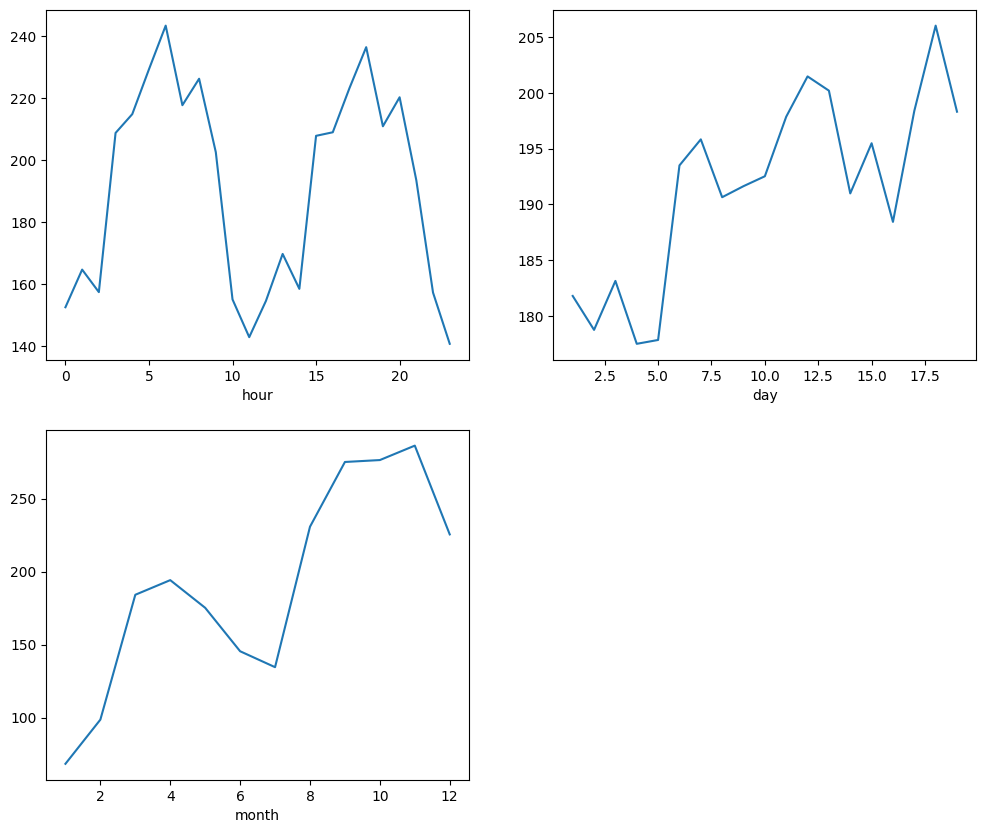

In [22]:
features = ['hour', 'day', 'month']

plt.subplots (figsize=(12,10))
for i, col in enumerate(features):
     plt.subplot(2, 2, i + 1)
     ab.groupby(col).mean() ['count'].plot()
plt.show()

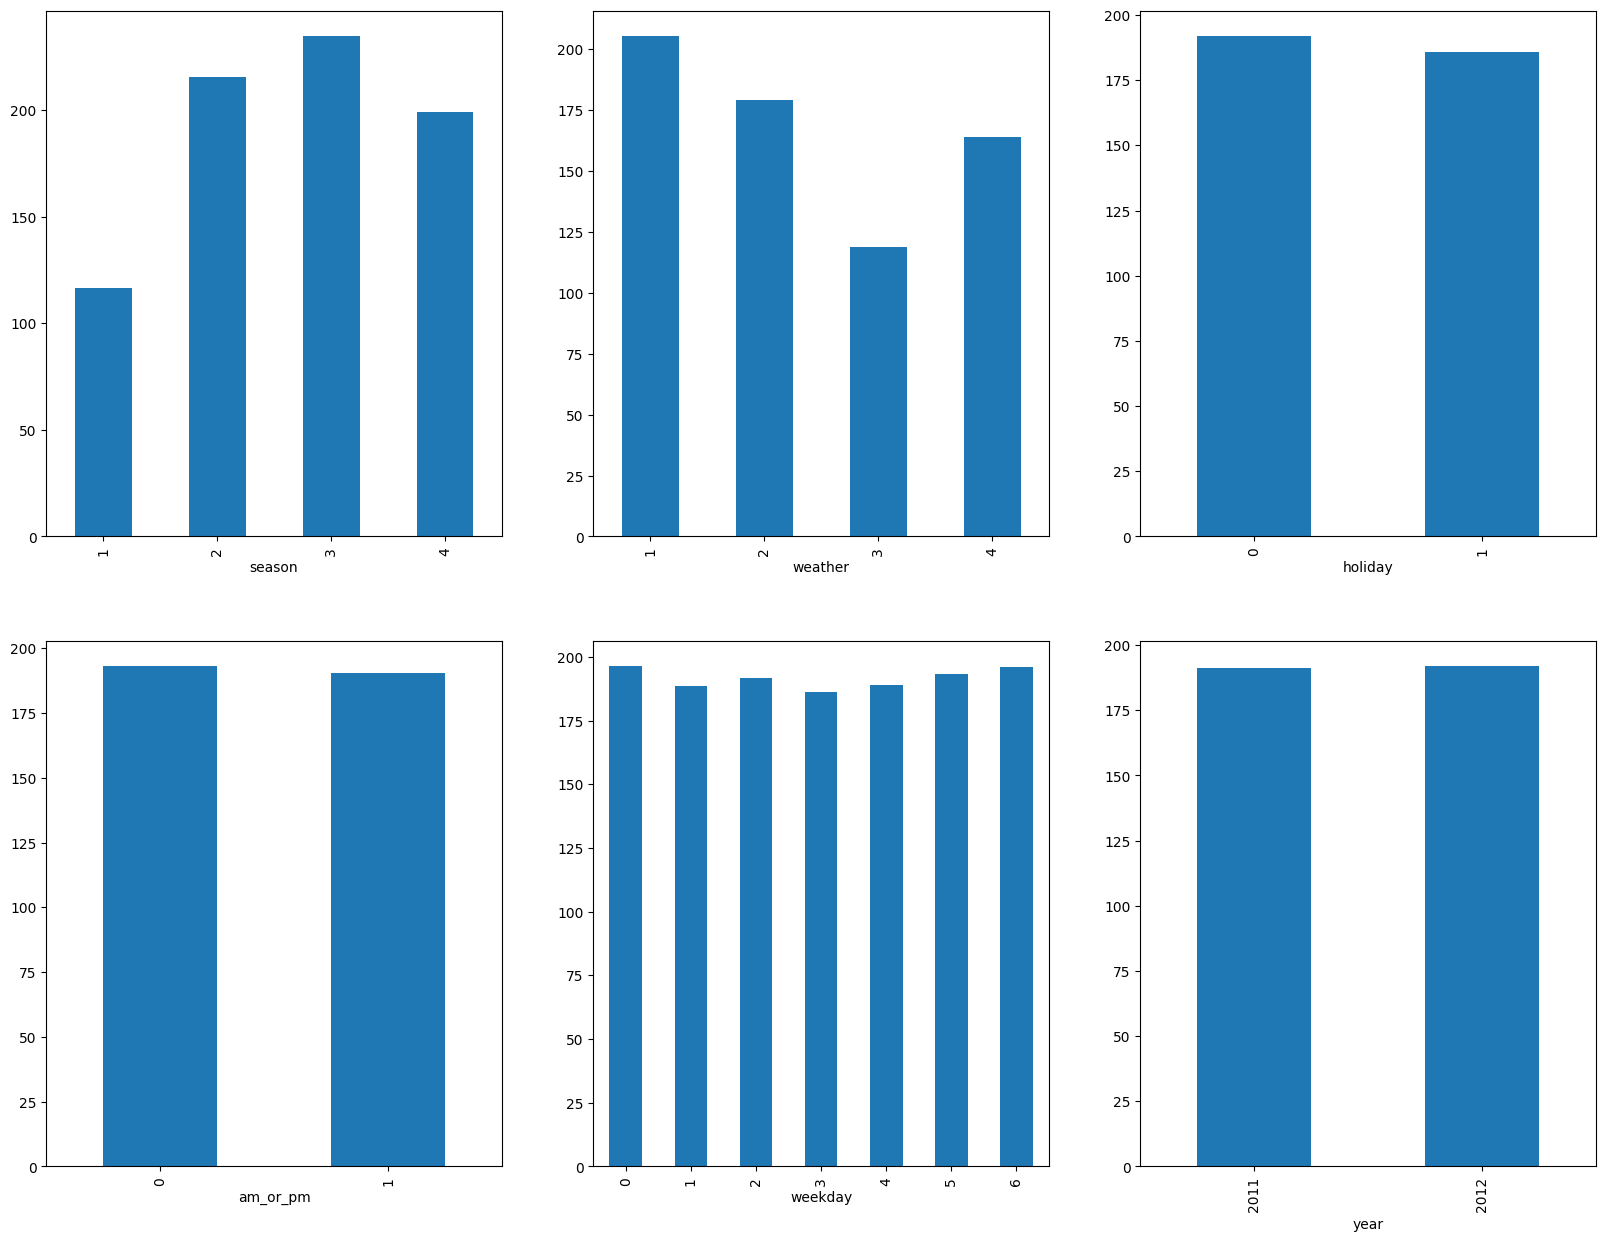

In [23]:
features =['season', 'weather', 'holiday',
            'am_or_pm', 'weekday', 'year']

plt.subplots(figsize=(20,15))
for i, col in enumerate(features):
  plt.subplot(2 ,3, i+1)
  ab.groupby(col).mean()['count'].plot.bar()
plt.show()

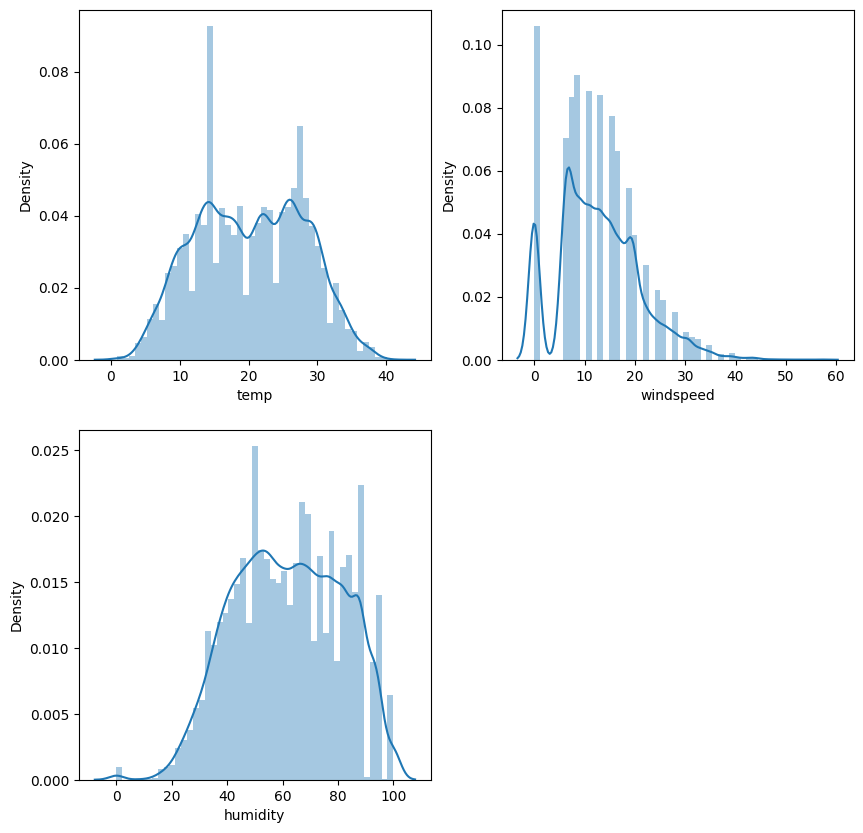

In [24]:
features = ['temp', 'windspeed', 'humidity']
plt.subplots(figsize=(10,10))
for i, col in enumerate(features):
  plt.subplot(2,2,i+1)
  sb.distplot(ab[col])
plt.show()

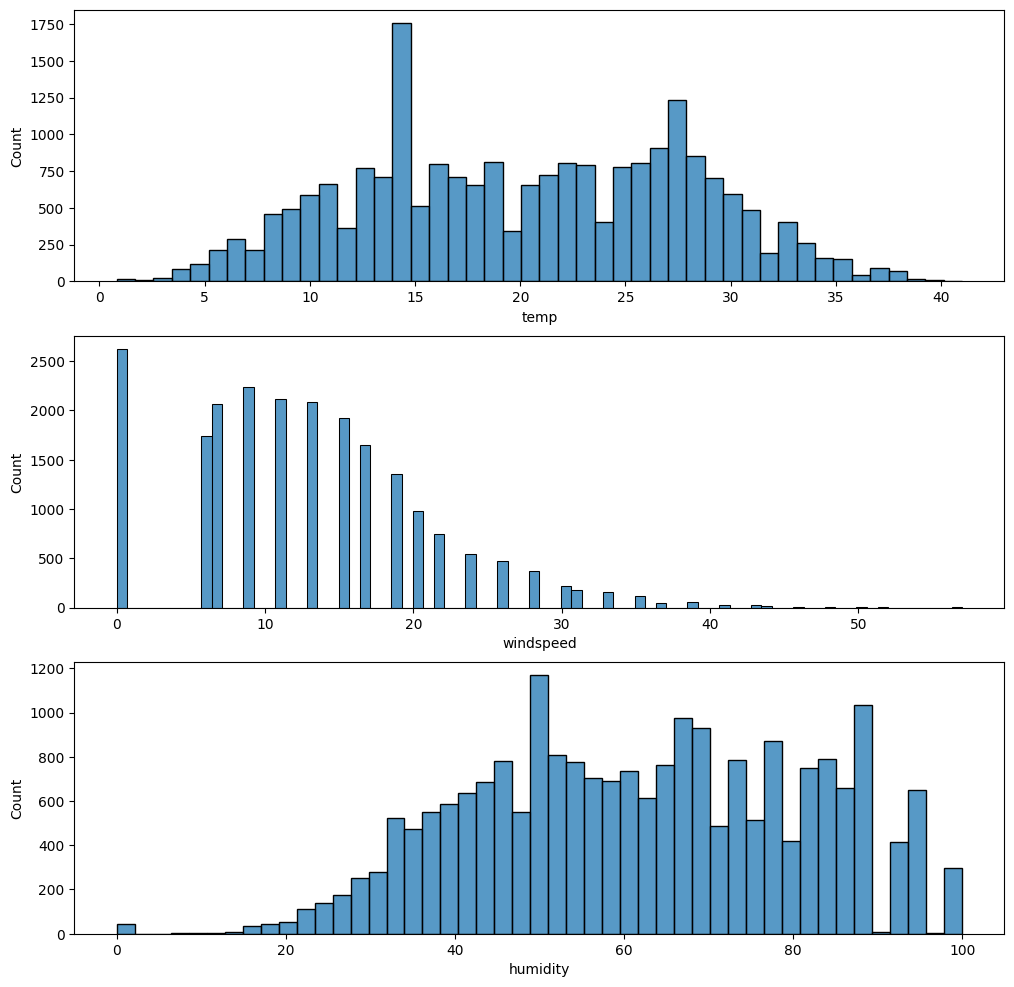

In [25]:
features=['temp', 'windspeed', 'humidity']
plt.subplots(figsize=(12,12))
for i, col in enumerate(features):
  plt.subplot(3,1,i+1)
  sb.histplot(ab[col])
plt.show()

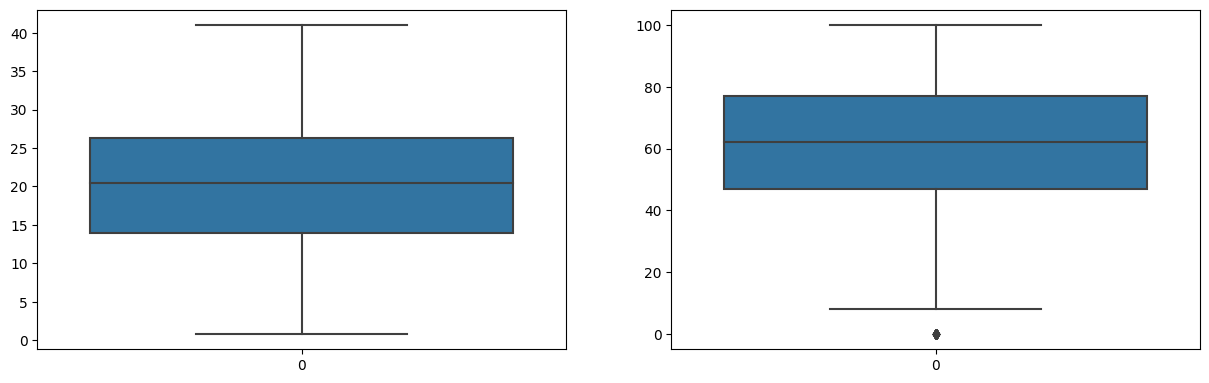

In [26]:
features = [ 'temp', 'humidity']
plt.subplots(figsize=(15,15))
for i, col in enumerate(features):
  plt.subplot(3,2,i+1)
  sb.boxplot(ab[col])
plt.show()

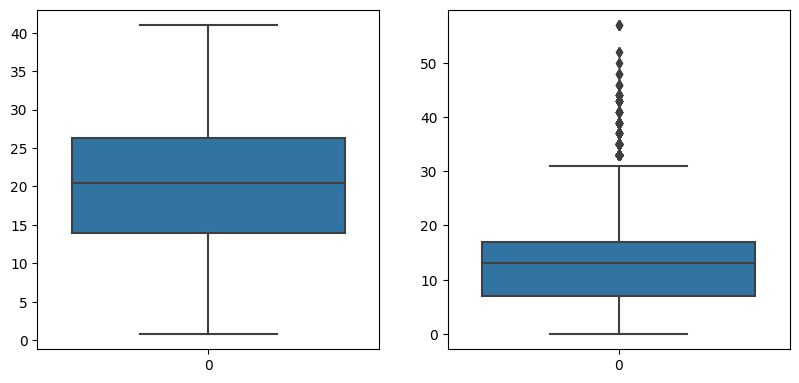

In [27]:
features = ['temp', 'windspeed']
  
plt.subplots(figsize=(15, 15))
for i, col in enumerate(features):
  plt.subplot(3, 3, i + 1)
  sb.boxplot(ab[col])
plt.show()

In [33]:
num_rows = ab.shape[0] - ab[ab['windspeed']<32] . shape[0]
print(f'Number of rows that wil be deleted after removing the outliers are {num_rows}')

Number of rows that wil be deleted after removing the outliers are 454


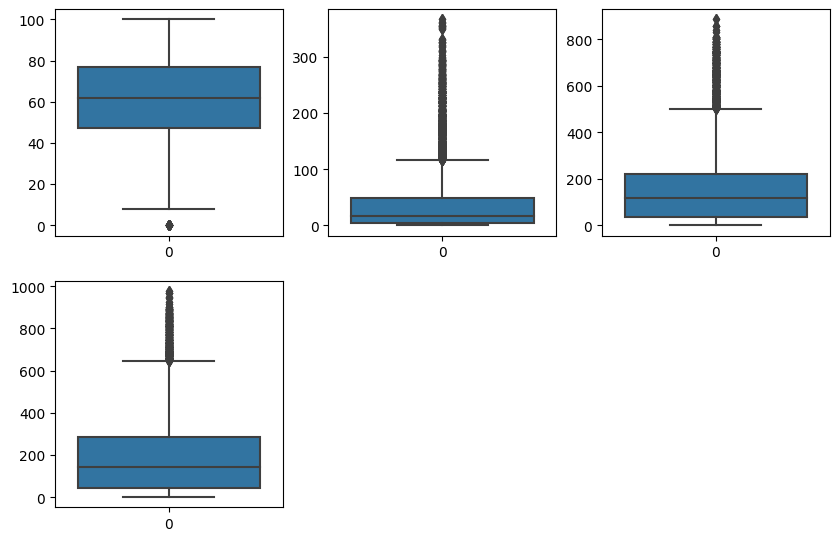

In [39]:
features = ['humidity', 'casual','registered','count']
plt.subplots(figsize=(10,10))
for i, col in enumerate(features):
  plt.subplot(3,3,i+1)
  sb.boxplot(ab[col])
plt.show()

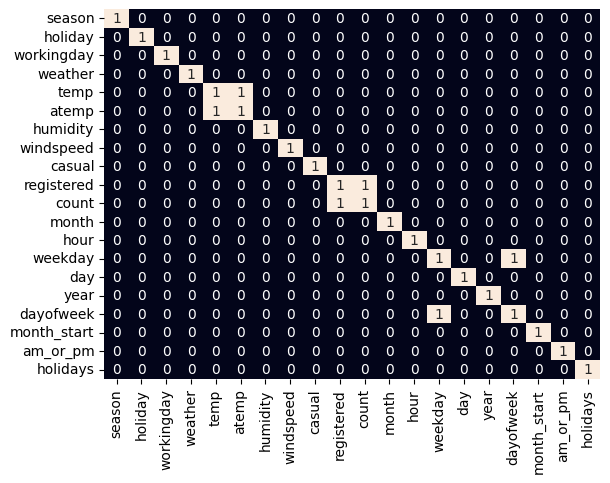

In [45]:
sb.heatmap(ab.corr()>0.9,
annot=True,
cbar=False)
plt.show()

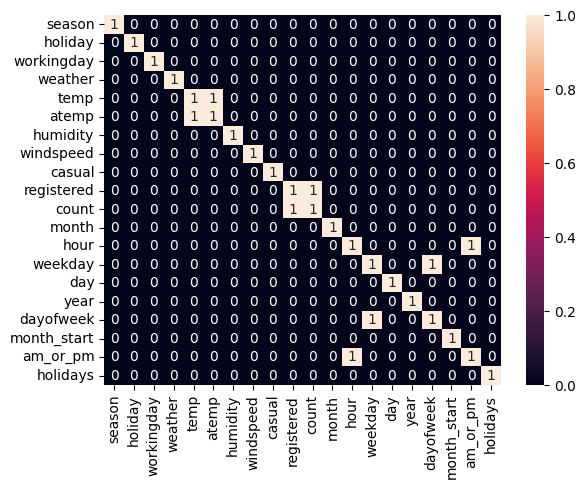

In [48]:
sb.heatmap(ab.corr()>0.7,
annot=True,
cbar=True)
plt.show()

In [50]:
ab.drop(['registered', 'hour'],  axis=1, inplace=True)
ab=ab[(ab['windspeed']<32) & (ab['humidity']>0)]

<Axes: >

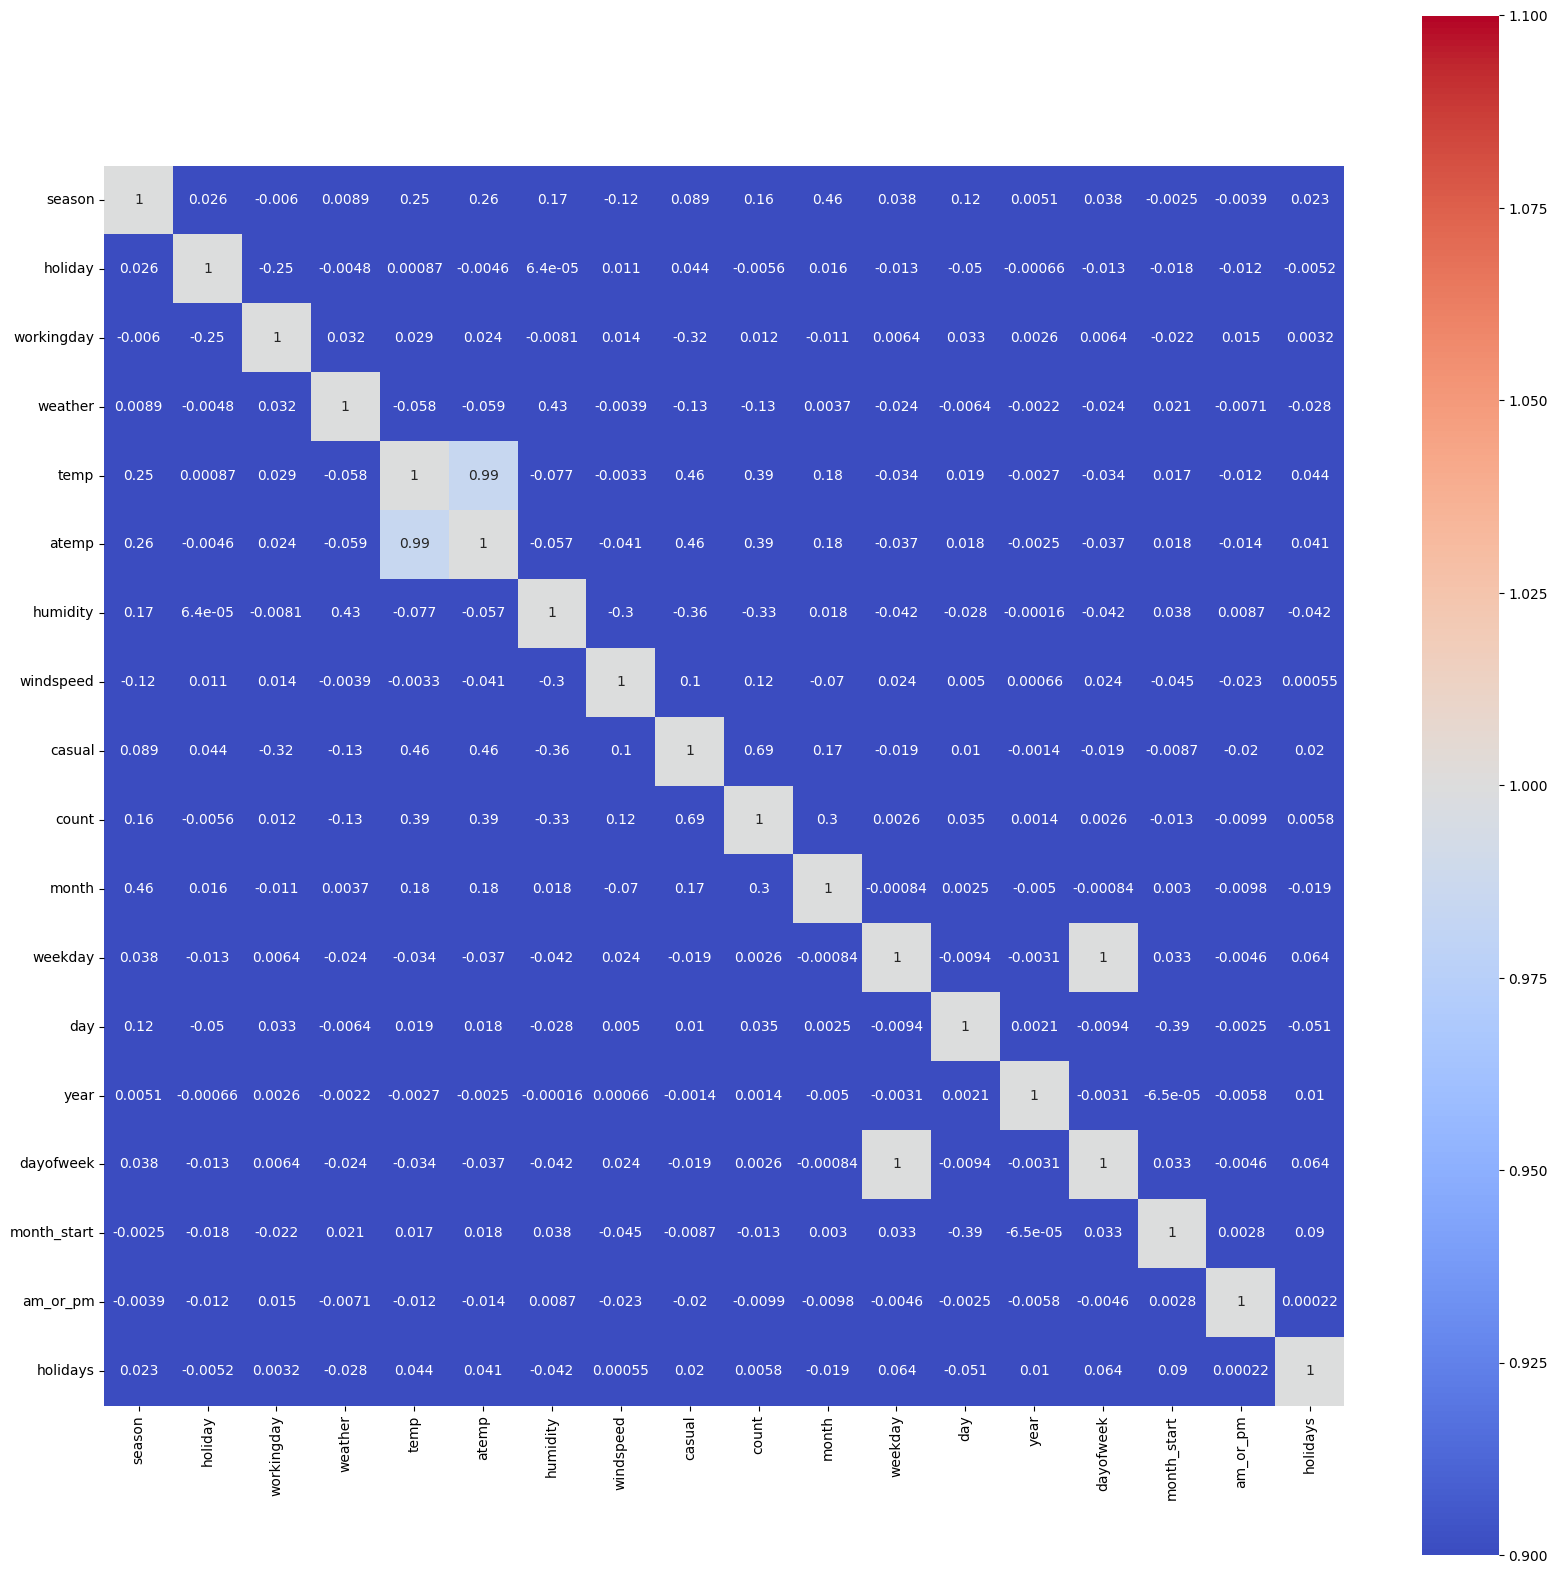

In [54]:
plt.figure(figsize=(20,20))
sb.heatmap(ab.corr("pearson"),
            vmin=1, vmax=1,
            cmap='coolwarm',
            annot=True,
            square=True)

In [59]:
features = ab.drop(['count'], axis=1)
target = ab['count'].values
  
X_train, X_val, Y_train, Y_val = train_test_split(features,
                                                  target,
                                                  test_size = 0.2,
                                                  random_state=22)
X_train.shape, X_val.shape

((17020, 17), (4256, 17))

In [62]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

In [63]:
from sklearn.metrics import mean_absolute_error as mae
models = [LinearRegression(), XGBRegressor(), Lasso(),
          RandomForestRegressor(), Ridge()]
  
for i in range(5):
    models[i].fit(X_train, Y_train)
  
    print(f'{models[i]} : ')
  
    train_preds = models[i].predict(X_train)
    print('Training Error : ', mae(Y_train, train_preds))
  
    val_preds = models[i].predict(X_val)
    print('Validation Error : ', mae(Y_val, val_preds))
    print()

LinearRegression() : 
Training Error :  83.30781616075947
Validation Error :  85.1297274519268

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...) : 
Training Error :  39.95375233323179
Validation Error :  53.77908214485567

Lasso() : 
Training Error :  83.00999569963147
Validation Error :  84.8498649777683

